In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times New Roman']})
rc('text', usetex=True)
%matplotlib inline

$\textbf{I. Derivada fraccionaria de Caputo con la regla de Simpson 1/3}$

In [3]:
"""Parte(a)"""
def f(x): #Función suave
    return np.sin(2*np.pi*x)

def Der_f(x): #Derivada numérica de la funcion f(x)
    h1=1e-5
    return (f(x+h1)-f(x-h1))/(2*h1)

def f1(x,t,alpha): #Integrando de la derivada fraccionaria de Caputo
    return Der_f(x)/((t-x)**alpha)

def Simpson(N,t,eps,alpha): #Regla de Simpson
    #como a=0, h=(t-eps)/N
    a=0
    b=t-eps
    h=b/N #este también será nuestro espilon
    
    out=f1(a,t,alpha)
    for i in range(1,N,2):
        xi=a+i*h
        out+=4*f1(xi,t,alpha)
    for i in range(2,N,2):
        xi=a+i*h
        out+=2*f1(xi,t,alpha)
    out+=f1(b,t,alpha)
    return out*(h/3)

def DFC(N,t,eps,alpha): #Derivada fraccionaria de Caputo para 0<alpha<1
    a1 = 1/(sci.special.gamma(1-alpha))
    return a1*Simpson(N,t,eps,alpha)

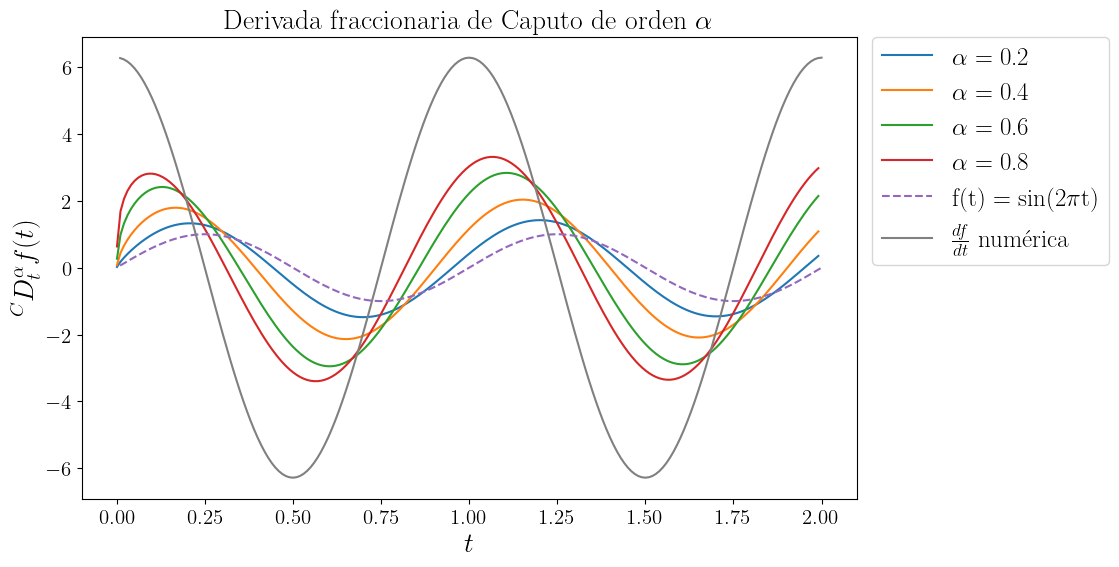

In [5]:
"""Parte(b)"""
A = [0.2,0.4,0.6,0.8] #Valores de alpha
dx=0.01

plt.figure(figsize=(10,6))
for alpha in A:
    X=[]
    Y=[]
    x=0.001
    while x<=2: 
        X.append(x)
        Y.append(DFC(10000,x,1e-4,alpha)) #N=10000, eps=1e-4
        x+=dx
    plt.plot(X,Y,label=r'$\alpha$ = '+str(alpha))
    
t=np.arange(0.01,2+dx,dx)

plt.plot(t,f(t),'--',label=r'f(t) = sin(2$\pi$t)')
plt.plot(t,Der_f(t),'-',color='gray',label=r'$\frac{df}{dt}$ numérica')
plt.title(r'Derivada fraccionaria de Caputo de orden $\alpha$',size=20)
plt.xlabel(r'$t$',size=20) 
plt.ylabel(r'$^{C}D_{t}^{\alpha} f(t)$',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',bbox_to_anchor=(1.02,1.00),borderaxespad=0, fontsize=18)
plt.show()

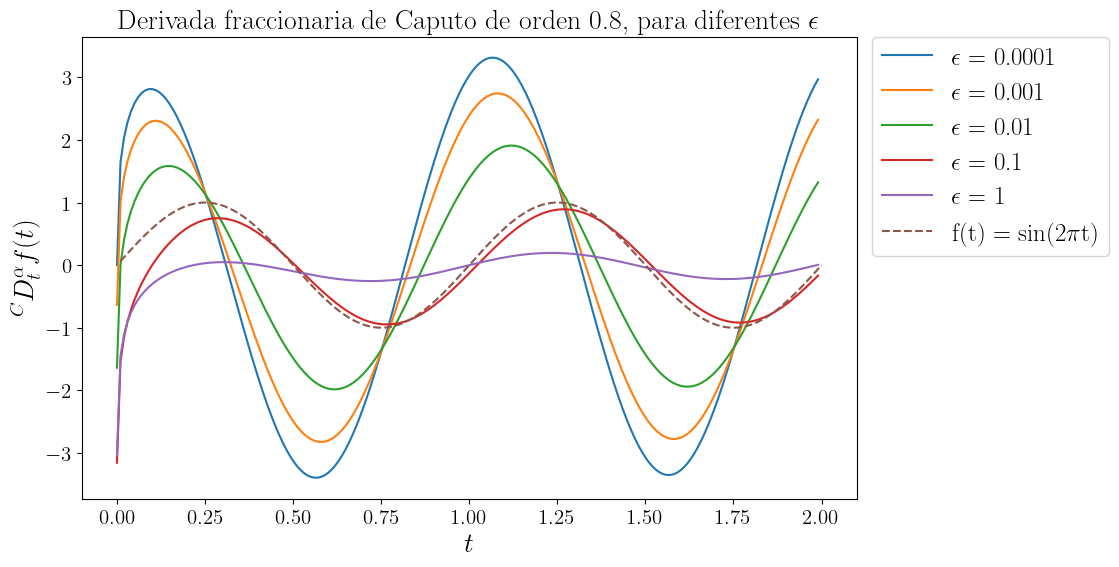

In [6]:
"""
Parte(c)
En este caso se utilizarán diferentes epsilon para un alpha fijo (0.8)
"""
E=[1e-4,1e-3,1e-2,1e-1,1] #Valores de epsilon, difieren en un orden de magnitud el uno del otro
alpha=0.8 #alpha fijo

plt.figure(figsize=(10,6))
for eps in E:
    X=[]
    Y=[]
    x=0.0001
    while x<=2: 
        X.append(x)
        Y.append(DFC(10000,x,eps,alpha)) #N=10000, mismo N del punto anterior
        x+=dx
    plt.plot(X,Y,label=r'$\epsilon$ = '+str(eps))
    
t=np.arange(0.01,2+dx,dx)
plt.plot(t,f(t),'--',label=r'f(t) = sin(2$\pi$t)')
plt.title(r'Derivada fraccionaria de Caputo de orden 0.8, para diferentes $\epsilon$',size=20)
plt.xlabel(r'$t$',size=20) 
plt.ylabel(r'$^{C}D_{t}^{\alpha} f(t)$',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',bbox_to_anchor=(1.02,1.00),borderaxespad=0, fontsize=18)
plt.show()

$\textbf{II. Derivada fraccionaria de Caputo utilizando SciPy}$

In [24]:
"""Parte(a)"""
def f_(x):
    return x*np.sin(x)

def Der_f_(x): #Derivada numérica de la funcion f(x)
    h1=1e-5
    return (f_(x+h1)-f_(x-h1))/(2*h1)

def I(t,eps,alpha):
    def Integrando(x):
        return Der_f_(x)/((t-x)**alpha)
    return sci.integrate.quad(Integrando,0,t-eps)[0]

def DFC_(t,eps,alpha): #Derivada fraccionaria de Caputo para 0<alpha<1
    a1_ = 1/(sci.special.gamma(1-alpha))
    return a1_*I(t,eps,alpha)

Usando un eps = 1e-4 (como en el inciso a), la derivada numérica se observa desplazada en comparación a la esperada analíticamente.

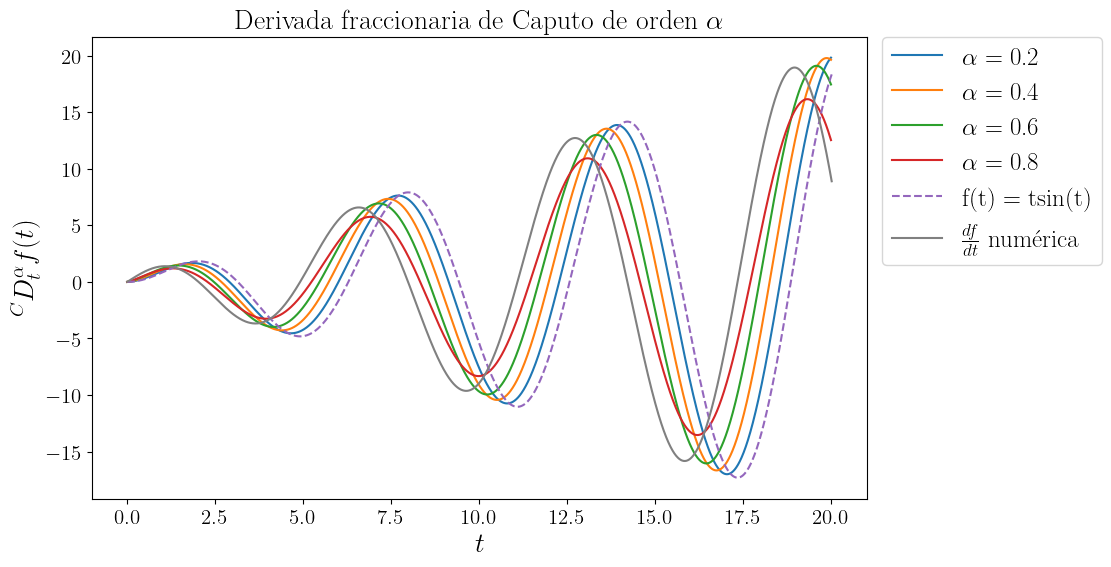

In [32]:
A = [0.2,0.4,0.6,0.8] #Valores de alpha
dx=0.01

plt.figure(figsize=(10,6))
for alpha in A:
    X1=[]
    Y1=[]
    x1=0
    while x1<=20: 
        X1.append(x1)
        Y1.append(DFC_(x1,1e-4,alpha)) #eps=1e-4
        x1+=dx
    plt.plot(X1,Y1,label=r'$\alpha$ = '+str(alpha))
    
t1=np.arange(0,20+dx,dx)

plt.plot(t1,f_(t1),'--',label=r'f(t) = tsin(t)')
plt.plot(t1,Der_f_(t1),'-',color='gray',label=r'$\frac{df}{dt}$ numérica')
plt.title(r'Derivada fraccionaria de Caputo de orden $\alpha$',size=20)
plt.xlabel(r'$t$',size=20) 
plt.ylabel(r'$^{C}D_{t}^{\alpha} f(t)$',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',bbox_to_anchor=(1.02,1.00),borderaxespad=0, fontsize=18)
plt.show()

Si se toma eps=0, la integral da warnings debido a la divergencia. Sin embargo, la gráfica (en el dominio pedido) resulta muy parecida al caso analítico:

C:\Users\ASUS\AppData\Local\Temp\ipykernel_66304\2179884769.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return Der_f_(x)/((t-x)**alpha)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_66304\2179884769.py:12: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  return sci.integrate.quad(Integrando,0,t-eps)[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_66304\2179884769.py:12: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return sci.integrate.quad(Integrando,0,t-eps)[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_66304\2179884769.py:12: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return sci.integrate.quad(Integrando,0,t-eps)[0]


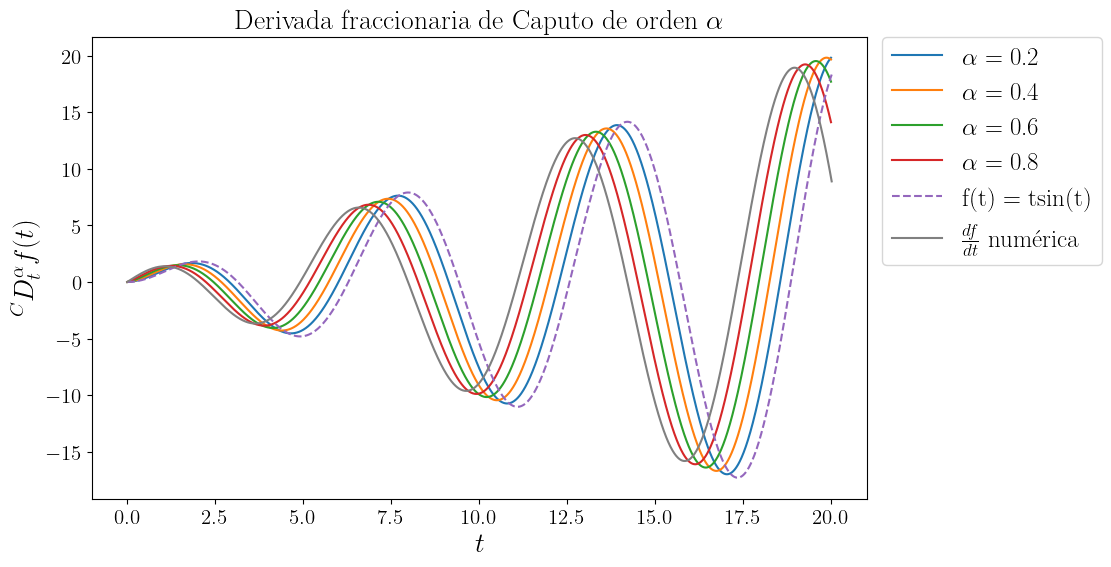

In [33]:
A = [0.2,0.4,0.6,0.8] #Valores de alpha
dx=0.01

plt.figure(figsize=(10,6))
for alpha in A:
    X1=[]
    Y1=[]
    x1=0
    while x1<=20: 
        X1.append(x1)
        Y1.append(DFC_(x1,0,alpha)) #eps=0
        x1+=dx
    plt.plot(X1,Y1,label=r'$\alpha$ = '+str(alpha))
    
t1=np.arange(0,20+dx,dx)

plt.plot(t1,f_(t1),'--',label=r'f(t) = tsin(t)')
plt.plot(t1,Der_f_(t1),'-',color='gray',label=r'$\frac{df}{dt}$ numérica')
plt.title(r'Derivada fraccionaria de Caputo de orden $\alpha$',size=20)
plt.xlabel(r'$t$',size=20) 
plt.ylabel(r'$^{C}D_{t}^{\alpha} f(t)$',size=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best',bbox_to_anchor=(1.02,1.00),borderaxespad=0, fontsize=18)
plt.show()